# Recurrent Neural Networks.

- A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. (Sequential Modelling).
- These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning.
- They are incorporated into popular applications such as Siri, voice search, and Google Translate etc.

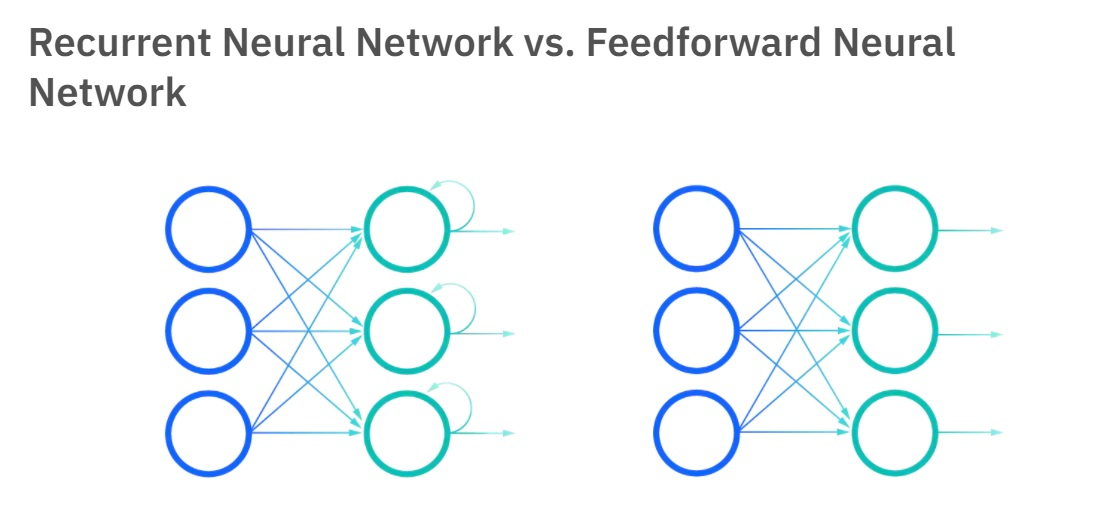

In [1]:
from IPython import display
display.Image("./rnn.jpg")

In [1]:
# standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data 
df=pd.read_csv('data/data.csv',parse_dates=True,index_col='DATE')
df.head(2)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524


In [3]:
# rename the RSCCASN column to sales 
df.columns=['Sales']
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


<AxesSubplot:xlabel='DATE'>

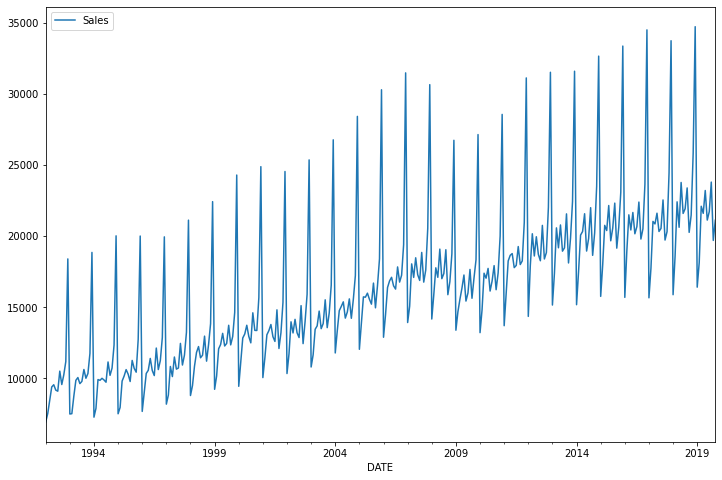

In [4]:
# plot the data 
df.plot(figsize=(12,8))

In [5]:
# check  the first and last date 
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [7]:
#first date 1992-01-01
#last date  2019-10-01

In [10]:
#total dataframe length
len(df)

334

In [11]:
#Data is monthly, let's forecast 1.5 years into the future.
len(df)-18

316

In [12]:
# test data 
test_size = 18
test_ind = len(df)- test_size

In [13]:
# training & test data 
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
train.shape

(316, 1)

In [14]:
test.shape

(18, 1)

In [15]:
# scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# Let's redefine to get 12 months back and then predict the next month out
length = 12

# create an instance of the class and specify the input and output aspects of your time series problem (input,output,length of traning data )
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=5)

In [17]:

# What does the first batch look like?
X,y = generator[0]

In [18]:
y

array([[0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484]])

In [21]:
scaled_train[:16]

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895]])

In [18]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266
 0.02127505 0.05580163 0.08942056 0.09512053 0.08146965 0.07860151
 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266 0.02047633
 0.05580163 0.08942056 0.09512053 0.08146965 0.07860151 0.12979233
 0.09566512 0.1203892  0.15426227 0.41595266 0.02047633 0.02127505
 0.08942056 0.09512053 0.08146965 0.07860151 0.12979233 0.09566512
 0.1203892  0.15426227 0.41595266 0.02047633 0.02127505 0.06636654
 0.09512053 0.08146965 0.07860151 0.12979233 0.09566512 0.1203892
 0.15426227 0.41595266 0.02047633 0.02127505 0.06636654 0.10633895]
Predict this y: 
 [[0.02047633]
 [0.02127505]
 [0.06636654]
 [0.10633895]
 [0.11345484]]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [24]:
# We're only using one feature in our time series
n_features = 1
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(100,input_shape=(length, n_features)))
#model.add(SimpleRNN(50))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100)               10200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
# fit model
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
61/61 [==============================] - 6s 33ms/step - loss: 0.0047 - val_loss: 6.6327e-04
Epoch 2/20
61/61 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/20
61/61 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 4.8525e-04
Epoch 4/20
61/61 [==============================] - 1s 17ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0029 - val_loss: 5.9818e-04
Epoch 6/20
61/61 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 9.6463e-04
Epoch 7/20
61/61 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 3.4409e-04
Epoch 9/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 10/20
61/61 [==============================] - 1s 17ms/step - loss: 0.0025 - val_lo

In [26]:
model.history.history

{'loss': [0.00471683731302619,
  0.0018388958415016532,
  0.0012188488617539406,
  0.0018012727377936244,
  0.002852901117876172,
  0.001484994194470346,
  0.0011457635555416346,
  0.0015574910212308168,
  0.0021310606971383095,
  0.0024966795463114977,
  0.001829543150961399,
  0.0019613809417933226,
  0.0016120903892442584],
 'val_loss': [0.0006632719305343926,
  0.0013114194152876735,
  0.00048525386955589056,
  0.0013011075789108872,
  0.0005981758586131036,
  0.0009646348189562559,
  0.0017516054213047028,
  0.0003440909495111555,
  0.001886875950731337,
  0.000638253113720566,
  0.0019544793758541346,
  0.007816738449037075,
  0.0007337872521020472]}

<AxesSubplot:>

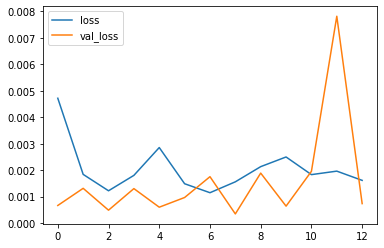

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [28]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.53252977],
       [0.48591345],
       [0.49364653],
       [0.56629393],
       [0.46405751],
       [0.48536886],
       [0.63534708],
       [0.97233517],
       [0.32468051],
       [0.42285071],
       [0.5615016 ],
       [0.49658728]])

In [29]:
current_batch = first_eval_batch.reshape((1, length, n_features))

for _ in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
current_batch

array([[[0.66090083],
        [0.99587518],
        [0.33055174],
        [0.46519911],
        [0.59941733],
        [0.49359947],
        [0.59943217],
        [0.50499642],
        [0.51333702],
        [0.57608277],
        [0.47893718],
        [0.39521417]]])

In [30]:
test_predictions

[array([0.5649984], dtype=float32),
 array([0.4940114], dtype=float32),
 array([0.5048955], dtype=float32),
 array([0.5682153], dtype=float32),
 array([0.47340247], dtype=float32),
 array([0.44367632], dtype=float32),
 array([0.66090083], dtype=float32),
 array([0.9958752], dtype=float32),
 array([0.33055174], dtype=float32),
 array([0.4651991], dtype=float32),
 array([0.5994173], dtype=float32),
 array([0.49359947], dtype=float32),
 array([0.5994322], dtype=float32),
 array([0.5049964], dtype=float32),
 array([0.513337], dtype=float32),
 array([0.57608277], dtype=float32),
 array([0.47893718], dtype=float32),
 array([0.39521417], dtype=float32)]

In [31]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[22500.31560707],
       [20545.05006027],
       [20844.84188032],
       [22588.92251444],
       [19977.39764333],
       [19158.62063241],
       [25141.85249519],
       [34368.38595152],
       [16042.71722317],
       [19751.4443655 ],
       [23448.35090542],
       [20533.7039237 ],
       [23448.75970125],
       [20847.62136364],
       [21077.35477161],
       [22805.62370825],
       [20129.84565425],
       [17823.77910447]])

In [32]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\user\AppData\Local\Temp/ipykernel_7976/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [33]:
test['Loss'] = abs(test['Sales'] - test['Predictions'])

C:\Users\user\AppData\Local\Temp/ipykernel_7976/1668801594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loss'] = abs(test['Sales'] - test['Predictions'])


In [34]:
test.head()

,Sales,Predictions,Loss
DATE,,,
2018-05-01,23764,22500.315607,1263.684393
2018-06-01,21589,20545.050060,1043.949940
2018-07-01,21919,20844.841880,1074.158120
2018-08-01,23381,22588.922514,792.077486
2018-09-01,20260,19977.397643,282.602357


In [35]:
sum(test['Loss'])

18071.213747024565

<AxesSubplot:xlabel='DATE'>

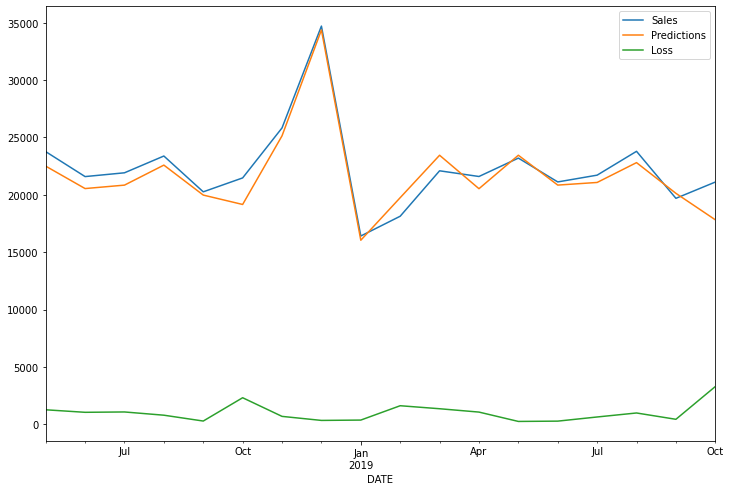

In [36]:
test.plot(figsize=(12,8))

- This kind of RNN suffered from the problem of <b>vanishing & exploding gradients </b>hence unable to model long term dependencies.
- Therefore, LSTM and GRU were developed to solve the problem with traditional RNNS.
- There two architecture use mechanisms known as <b>Gates</b>

In [37]:
#model
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [38]:
# We're only using one feature in our time series
n_features = 1

In [39]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [42]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [43]:
# fit model
model.fit(generator,epochs=25,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/25
61/61 [==============================] - 1s 18ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 2/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0054 - val_loss: 5.8455e-04
Epoch 3/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 4/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 5/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 6/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 7/25
61/61 [==============================] - 1s 15ms/step - loss: 0.0021 - val_loss: 0.0078


In [44]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

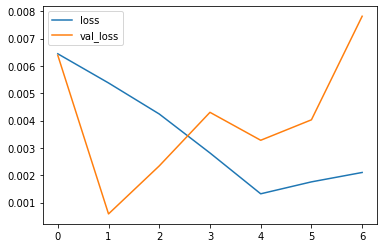

In [45]:
losses.plot()

Evaluate on Test Data¶


In [46]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [47]:
true_predictions = scaler.inverse_transform(test_predictions)

In [48]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\user\AppData\Local\Temp/ipykernel_7976/1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [49]:
test['Loss'] = abs(test['Sales'] - test['Predictions'])

C:\Users\user\AppData\Local\Temp/ipykernel_7976/1668801594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loss'] = abs(test['Sales'] - test['Predictions'])


In [50]:
sum(test['Loss'])

72250.13109469417

In [51]:
test.head()

,Sales,Predictions,Loss
DATE,,,
2018-05-01,23764,18840.352554,4923.647446
2018-06-01,21589,17922.545984,3666.454016
2018-07-01,21919,18083.117375,3835.882625
2018-08-01,23381,19586.093018,3794.906982
2018-09-01,20260,17700.201273,2559.798727


<AxesSubplot:xlabel='DATE'>

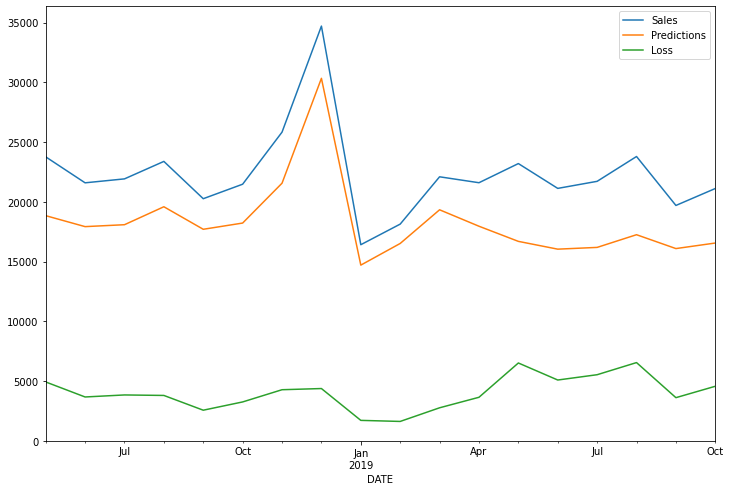

In [52]:
test.plot(figsize=(12,8))

In [53]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [54]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [55]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
#model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit(generator,epochs=8)


Epoch 1/8
322/322 [==============================] - 9s 12ms/step - loss: 0.0264
Epoch 2/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0176
Epoch 3/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0115
Epoch 4/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0058
Epoch 5/8
322/322 [==============================] - 4s 13ms/step - loss: 0.0029
Epoch 6/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0016
Epoch 7/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0016
Epoch 8/8
322/322 [==============================] - 4s 12ms/step - loss: 0.0013: 0s - l


In [56]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [57]:
forecast = scaler.inverse_transform(forecast)

In [60]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [61]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [62]:
forecast_df

,Forecast
2019-11-01,25419.413374
2019-12-01,34876.433802
2020-01-01,16393.426288
2020-02-01,18236.784386
2020-03-01,21568.591098
2020-04-01,21301.908457
2020-05-01,22719.942400
2020-06-01,21019.345165
2020-07-01,21625.858634
2020-08-01,23317.322811


<AxesSubplot:>

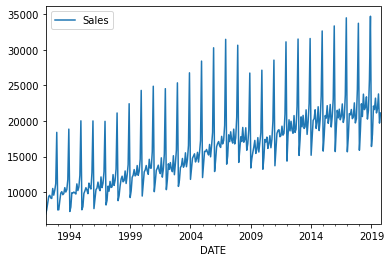

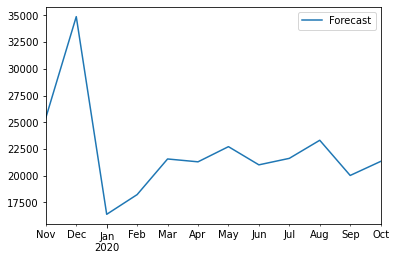

In [63]:
df.plot()
forecast_df.plot()

<AxesSubplot:xlabel='DATE'>

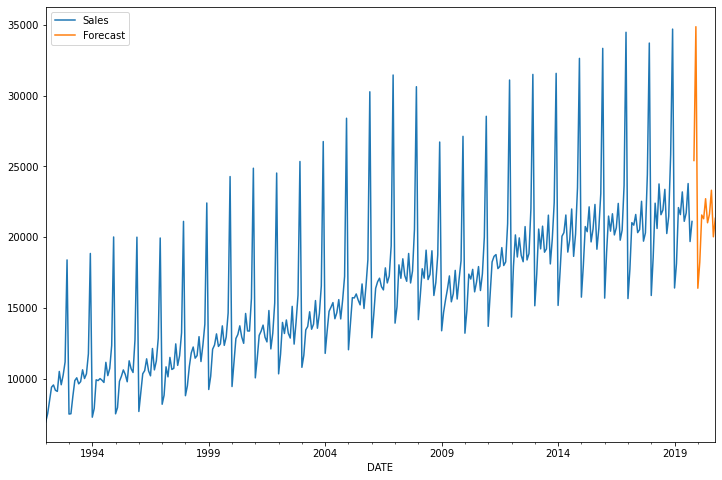

In [64]:
ax = df.plot(figsize=(12,8))
forecast_df.plot(ax=ax)

(576.0, 611.0)

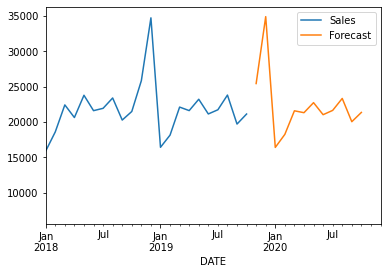

In [65]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

# END